In [1]:
import pandas as pd
ts1 = [1,2,2,3]
ts2 = [1,1,2,2]
dataCols = {'x':ts1,'y':ts2}
df = pd.DataFrame(data=dataCols)
df


,x,y
0,1,1
1,2,1
2,2,2
3,3,2


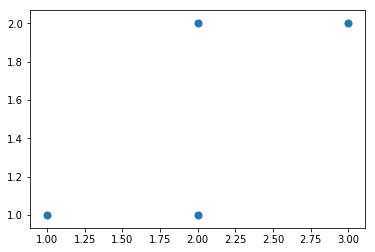

In [2]:
import matplotlib.pyplot as mp
import numpy as np
x = np.array(df['x'])
y = np.array(df['y'])
mp.scatter(x,y,s=50)
mp.show()

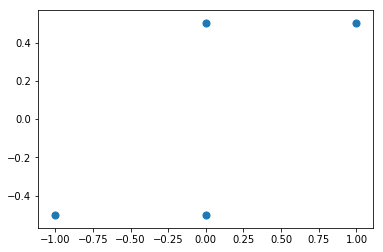

In [3]:
mean_x = np.mean(x)
mean_y = np.mean(y)
for x in df.columns:
  df[x] = df[x] - df[x].mean()
  
df
x = np.array(df['x'])
y = np.array(df['y'])
mp.scatter(x,y,s=50)
mp.show()

In [4]:
x1 = np.array(df['x'])
y1 = np.array(df['y'])
X  = np.vstack((x1, y1)).T
X

array([[-1. , -0.5],
       [ 0. , -0.5],
       [ 0. ,  0.5],
       [ 1. ,  0.5]])

In [5]:
X_trans = np.transpose(X)
X_trans

array([[-1. ,  0. ,  0. ,  1. ],
       [-0.5, -0.5,  0.5,  0.5]])

In [6]:
XXT = X.dot(X_trans)
XXT

array([[ 1.25,  0.25, -0.25, -1.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-1.25, -0.25,  0.25,  1.25]])

In [7]:
w,v = np.linalg.eig(XXT)
print(w,"\n",v)

[ 2.61803399e+00  3.81966011e-01 -9.45799730e-17 -2.55373581e-17] 
 [[-0.68819096  0.16245985  0.67618941  0.02708022]
 [-0.16245985 -0.68819096  0.20680399  0.70658804]
 [ 0.16245985  0.68819096  0.20680399  0.70658804]
 [ 0.68819096 -0.16245985  0.67618941  0.02708022]]


In [8]:
lambda1 = w[0]
v1 = v[:,0]
Y = np.dot(np.sqrt(lambda1),v1)
Y

array([-1.11351636, -0.26286556,  0.26286556,  1.11351636])

In [0]:
from scipy.spatial import distance_matrix
import pandas as pd

Dx = pd.DataFrame(distance_matrix(X, X))

In [10]:
Dx

,0,1,2,3
0,0.000000,1.000000,1.414214,2.236068
1,1.000000,0.000000,1.000000,1.414214
2,1.414214,1.000000,0.000000,1.000000
3,2.236068,1.414214,1.000000,0.000000


In [11]:
from math import sqrt
dist = lambda p1, p2: sqrt((p1-p2)**2)
dm = np.asarray([[dist(p1, p2) for p2 in Y] for p1 in Y])
Dy = pd.DataFrame(dm)
Dy

,0,1,2,3
0,0.000000,0.850651,1.376382,2.227033
1,0.850651,0.000000,0.525731,1.376382
2,1.376382,0.525731,0.000000,0.850651
3,2.227033,1.376382,0.850651,0.000000


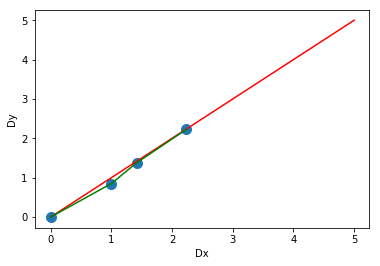

In [12]:
import matplotlib.pyplot as mp

mp.scatter(Dx[0],Dy[0],s=100)
mp.xlabel('Dx')
mp.ylabel('Dy')
mp.plot([0,5], [0,5], color='r')
mp.plot(Dx[0],Dy[0], color='g')
mp.show()

In [13]:
np.dot(, on) / np.dot(on, on) * on

SyntaxError: ignored